Importação das Bibiliotecas

In [11]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns

Importação do Dataset

In [12]:
uploaded = files.upload()

for filename in uploaded.keys():

    dataset = pd.read_csv(filename)
    print(f"Arquivo {filename} carregado com sucesso!")

print(dataset.head())

Saving ^BVSP.csv to ^BVSP (2).csv
Arquivo ^BVSP (2).csv carregado com sucesso!
         Date     Open     High      Low    Close  Adj Close   Volume
0  2019-06-10  97828.0  97856.0  96782.0  97467.0    97467.0  3584000
1  2019-06-11  97467.0  98985.0  97467.0  98960.0    98960.0  4922400
2  2019-06-12  98960.0  99240.0  97831.0  98321.0    98321.0  4948800
3  2019-06-13  98321.0  99364.0  98321.0  98774.0    98774.0  5594000
4  2019-06-14  98776.0  98981.0  97601.0  98040.0    98040.0  9184900


Informações Estatísticas

In [13]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03
mean,110800.805153,111802.390499,109804.262480,110816.366345,110816.366345,1.022086e+07
std,11761.737982,11515.426308,11966.531534,11759.324526,11759.324526,3.704335e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,103708.750000,104572.000000,102750.000000,103775.000000,103775.000000,8.209400e+06
50%,111438.500000,112532.500000,110465.500000,111487.000000,111487.000000,1.032340e+07
75%,118410.000000,119382.000000,117630.250000,118469.250000,118469.250000,1.242050e+07
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,2.602930e+07


Gráfico dos preços High e Low ao longo dos anos

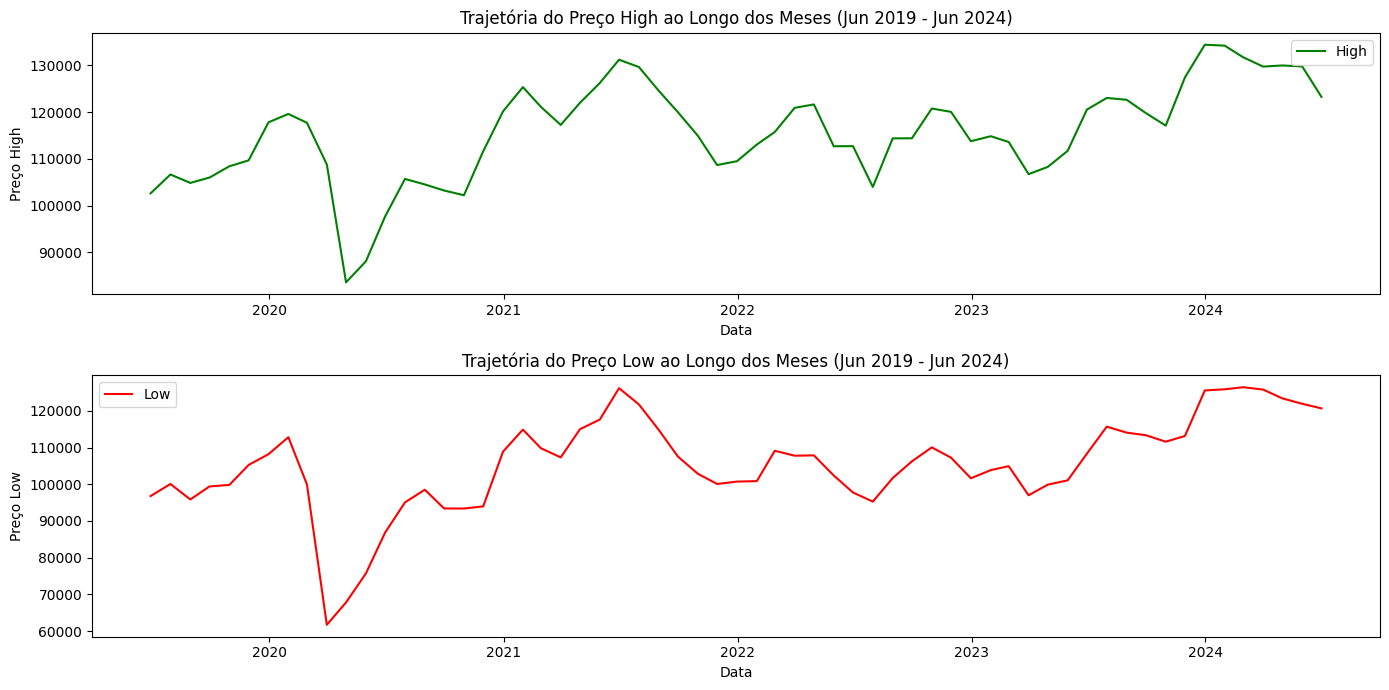

In [14]:
start_date = '2019-06-10'
end_date = '2024-06-10'
mask = (dataset['Date'] >= start_date) & (dataset['Date'] <= end_date)
filtered_data = dataset.loc[mask]

filtered_data.set_index('Date', inplace=True)
filtered_data.index = pd.to_datetime(filtered_data.index)

monthly_data = filtered_data.resample('M').agg({'High': 'max', 'Low': 'min'})

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(monthly_data.index, monthly_data['High'], label='High', color='green')
plt.title('Trajetória do Preço High ao Longo dos Meses (Jun 2019 - Jun 2024)')
plt.xlabel('Data')
plt.ylabel('Preço High')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(monthly_data.index, monthly_data['Low'], label='Low', color='red')
plt.title('Trajetória do Preço Low ao Longo dos Meses (Jun 2019 - Jun 2024)')
plt.xlabel('Data')
plt.ylabel('Preço Low')
plt.legend()

plt.tight_layout()
plt.show()

Gráfico dos preços fechados

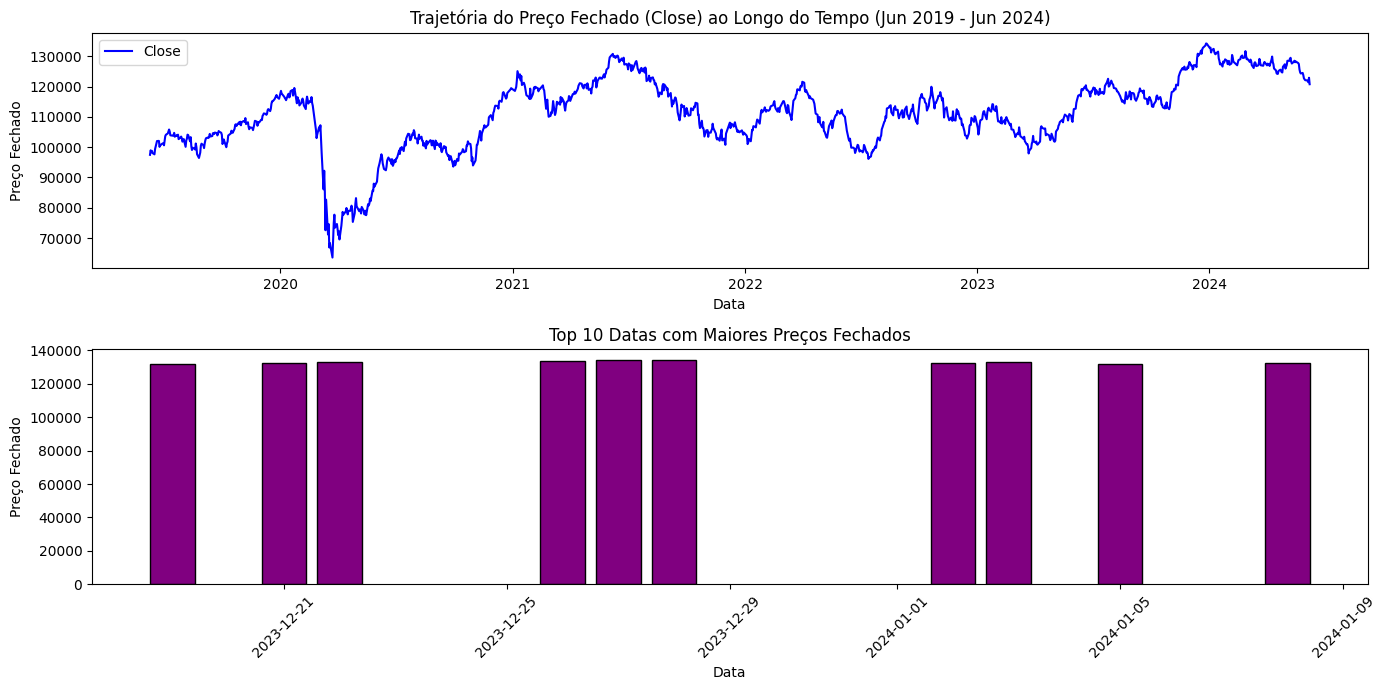

In [15]:
start_date = '2019-06-10'
end_date = '2024-06-10'
mask = (dataset['Date'] >= start_date) & (dataset['Date'] <= end_date)
filtered_data = dataset.loc[mask]

filtered_data.set_index('Date', inplace=True)
filtered_data.index = pd.to_datetime(filtered_data.index)

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(filtered_data.index, filtered_data['Close'], label='Close', color='blue')
plt.title('Trajetória do Preço Fechado (Close) ao Longo do Tempo (Jun 2019 - Jun 2024)')
plt.xlabel('Data')
plt.ylabel('Preço Fechado')
plt.legend()

top_n = 10
top_close = filtered_data.nlargest(top_n, 'Close')
top_close_dates = top_close.index
top_close_values = top_close['Close']

plt.subplot(2, 1, 2)
plt.bar(top_close_dates, top_close_values, color='purple', edgecolor='black')
plt.title(f'Top {top_n} Datas com Maiores Preços Fechados')
plt.xlabel('Data')
plt.ylabel('Preço Fechado')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Normalizando os Dados



In [17]:
from sklearn.preprocessing import MinMaxScaler

training_set = dataset.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(training_set)

Incorporando os Timestamps

In [20]:
X_train = []
y_train = []
total_size = len(scaled_data)

for i in range(60, total_size):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Importação do Modelo LSTM

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Construção do Modelo LSTM

In [22]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

model.summary()

Epoch 1/100
37/37 [==============================] - 6s 45ms/step - loss: 0.0548
Epoch 2/100
37/37 [==============================] - 2s 62ms/step - loss: 0.0107
Epoch 3/100
37/37 [==============================] - 2s 64ms/step - loss: 0.0087
Epoch 4/100
37/37 [==============================] - 2s 46ms/step - loss: 0.0079
Epoch 5/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0068
Epoch 6/100
37/37 [==============================] - 2s 45ms/step - loss: 0.0062
Epoch 7/100
37/37 [==============================] - 2s 45ms/step - loss: 0.0059
Epoch 8/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 9/100
37/37 [==============================] - 2s 58ms/step - loss: 0.0051
Epoch 10/100
37/37 [==============================] - 3s 73ms/step - loss: 0.0050
Epoch 11/100
37/37 [==============================] - 2s 44ms/step - loss: 0.0058
Epoch 12/100
37/37 [==============================] - 2s 45ms/step - loss: 0.0051
Epoch 13/100
37/37 [=====

Normalização e Construção do LSTM para os Dados de Teste<br>
Predição dos Preços

In [23]:
uploaded = files.upload()

for filename in uploaded.keys():

    datasettest = pd.read_csv(filename)
    print(f"Arquivo {filename} carregado com sucesso!")

print(datasettest.head())

Saving datasettest.csv to datasettest.csv
Arquivo datasettest.csv carregado com sucesso!
         Date      Open      High       Low     Close  Adj Close    Volume
0  2024-05-13  127600.0  128669.0  127599.0  128155.0   128155.0   8917300
1  2024-05-14  128155.0  128965.0  127962.0  128515.0   128515.0  11886800
2  2024-05-15  128514.0  128646.0  127029.0  128028.0   128028.0  10855600
3  2024-05-16  128029.0  128965.0  127922.0  128284.0   128284.0   9852200
4  2024-05-17  128280.0  128464.0  127696.0  128151.0   128151.0  10262600


38/38 [==============================] - 1s 18ms/step
[[100548.82]
 [100714.9 ]
 [100970.49]
 ...
 [121529.52]
 [121209.13]
 [120927.96]]


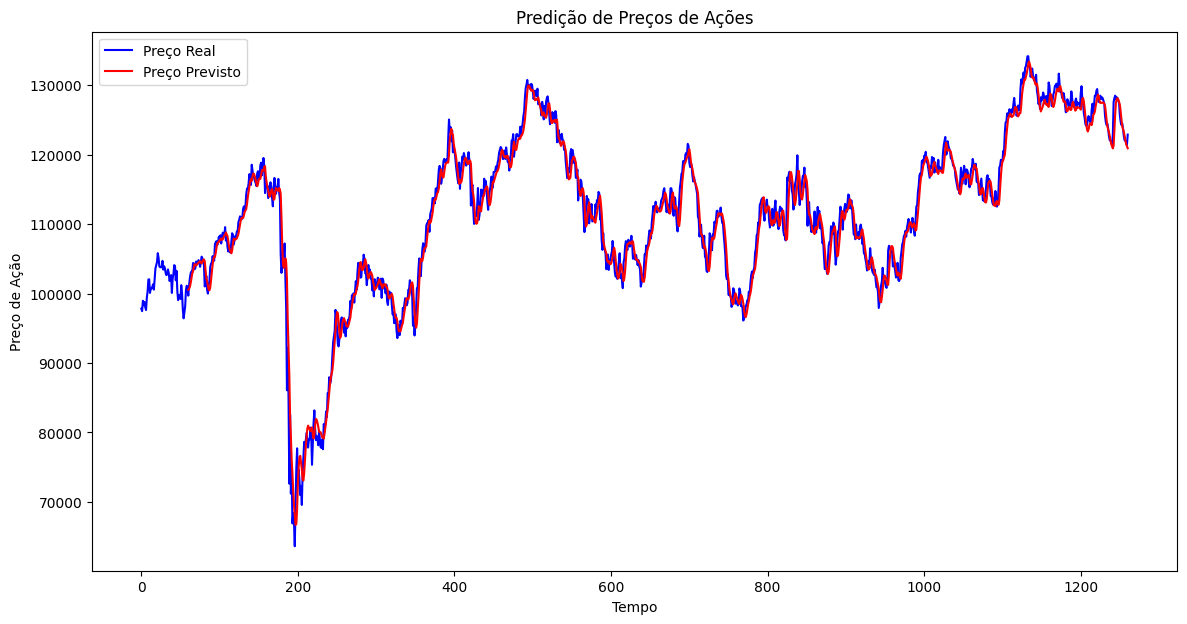

In [25]:
stockpricetestdata = datasettest.iloc[:, 1:2].values

final_dataset = pd.concat((dataset['Open'], datasettest['Open']), axis = 0)

finalscaler = MinMaxScaler(feature_range=(0, 1))
final_dataset_scaled = finalscaler.fit_transform(final_dataset.values.reshape(-1, 1))

X_test = []
for i in range(60, len(final_dataset_scaled)):
    X_test.append(final_dataset_scaled[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print(predicted_stock_price)

plt.figure(figsize=(14, 7))
plt.plot(final_dataset.values, color='blue', label='Preço Real')
plt.plot(range(60, len(predicted_stock_price) + 60), predicted_stock_price, color='red', label='Preço Previsto')
plt.title('Predição de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço de Ação')
plt.legend()
plt.show()